In [1]:
import numpy as np
import sys
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

In [2]:
SAMPLE_RATE = 44_100
DURATION = 10
FREQUENCY = 50

In [3]:
# create a pure tone file with phase shift

# tone generating
phi = 90
time = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
sinewave = np.sin(2 * np.pi * FREQUENCY * time + np.radians(phi))

# saving
path = "../data/raw/synthetic/nominal_enf.wav"
wav_sinewave = np.int16(sinewave * 32767)
write(path, SAMPLE_RATE, wav_sinewave)

sinewave shape: (441000,)
time: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 9.99993197e+00
 9.99995465e+00 9.99997732e+00]
sinewave: [1.         0.99997463 0.9998985  ... 0.99977164 0.9998985  0.99997463]


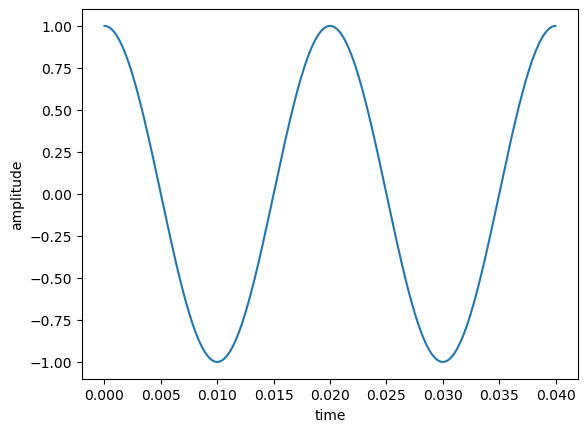

In [4]:
# look at tone
print("sinewave shape:", sinewave.shape)
print("time:", time)
print("sinewave:", sinewave)

plt.plot(time[: 2 * SAMPLE_RATE // FREQUENCY], sinewave[: 2 * SAMPLE_RATE // FREQUENCY])
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

In [14]:
# # insert cuts
# n_cuts = 3
# cut_times = np.sort(np.random.random(2*n_cuts)).reshape(n_cuts,2)*DURATION
# print(np.diff(cut_times))
# deleted_time = np.sum(np.diff(cut_times))

# # tone generating
# time = np.linspace(0, DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
# sinewave = np.sin(2 * np.pi * FREQUENCY * time + np.radians(phi))
# cut_inds = np.searchsorted(time, cut_times)

# # print((cut_times<time[cut_inds]).flatten())
# del time

# for start, stop in cut_inds[::-1]:
#     pass


# # saving
# path = "../data/raw/synthetic/cutted_enf.wav"
# wav_sinewave = np.int16(sinewave * 32767)
# write(path, SAMPLE_RATE, wav_sinewave)

ValueError: cannot reshape array of size 6 into shape (2,2)

In [6]:
# have some functions

def write_tone_to_file(tone: np.ndarray, path: str, sample_rate: int) -> None:
    wav_tone = np.int16(tone*32767)
    write(path, sample_rate, wav_tone)

def make_sine_tone(duration: float, frequency: float, sample_rate: int, phi: float=0) -> np.ndarray:
    time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    sinewave = np.sin(2 * np.pi * frequency * time + np.radians(phi))
    return sinewave


# tone = make_sine_tone(duration=3, frequency=50, sample_rate=SAMPLE_RATE)
# write_tone_to_file(tone=tone, path="../data/raw/synthetic/nominal_enf_tone.wav", sample_rate=SAMPLE_RATE)